# Assignment: Data Wrangling
## `! git clone https://github.com/DS3001/wrangling`
## Do Q2, and one of Q1 or Q3.

In [2]:
! git clone https://github.com/DS3001/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 92 (delta 42), reused 18 (delta 18), pack-reused 40 (from 1)
Receiving objects: 100% (92/92), 18.08 MiB | 6.36 MiB/s, done.
Resolving deltas: 100% (43/43), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [3]:
# 1.
# Importing relavant packages:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = './wrangling/assignment/data/airbnb_hw.csv'
adf = pd.read_csv(path, low_memory=False) # Creating an airbnb dataframe
adf.head()  # Taking a look at the airbnb dataframe

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [5]:
adf['Price'].unique() # Taking a closer look specifically at the Price
                      #  column. Because the data was imported as
                      #  strings, numbers greater than 999 will have
                      #  commas (e.g.: 3,000). These need to be removed.

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [6]:
# Removing the commas from the 'Price' column:
adf['Price'] = adf['Price'].str.replace(',', '')
# Converting the string values to floats:
adf['Price'] = pd.to_numeric(adf['Price'])

# Displaying the price column again to ensure its good-to-go:
adf['Price'].unique()

array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

In [7]:
# 2.
path = './wrangling/assignment/data/sharks.csv'
sdf = pd.read_csv(path, low_memory=False) # Creating a shark dataframe

sdf.head() # Taking a quick look at the sharks dataframe:

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(sdf['Type'].value_counts()) # Printing the kinds of shark
                                  #  attacks and their frequency

Type
Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: count, dtype: int64


In [11]:
# Replacing all boating-adjacent types with 'Boating':
sdf['Type'] = sdf['Type'].replace(['Sea Disaster', 'Boat', 'Boating', 'Boatomg', 'Watercraft'], 'Boating')
# Replacing all questionable, unconfirmed, etc. types with 'Outlier':
sdf['Type'] = sdf['Type'].replace(['Invalid', 'Questionable', 'Unconfirmed', 'Unverified', 'Under investigation'], 'Outlier')

# Printing the 'Types' column to verify the changes:
print(sdf['Type'].value_counts())

Type
Unprovoked    4716
Provoked       593
Boating        583
Outlier        565
Name: count, dtype: int64


In [12]:
# 3.
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
ddf = pd.read_csv(url,low_memory=False) # Creating a defendant dataframe
ddf.head()  # Taking a look at the defendant dataframe

KeyboardInterrupt: 

In [ ]:
# Taking a closer look at the "Whether Defendant Was Released Pretrial" variable:
print(ddf['WhetherDefendantWasReleasedPretrial'].value_counts())

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64


In [ ]:
# We want to get rid of the values corresponding to "9",
# because those are marked unclear/missing in the codebook.

# Replacing all values corresponding to "9" to a NaN:
ddf['WhetherDefendantWasReleasedPretrial'] = ddf['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)

# Printing the "WhetherDefendant..." data again to verify the change:
print(ddf['WhetherDefendantWasReleasedPretrial'].value_counts())

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64


In [ ]:
# 4.
# Taking a look at the values for the two catagories to be worked on:
print(ddf['ImposedSentenceAllChargeInContactEvent'].unique())
print(ddf['SentenceTypeAllChargesAtConvictionInContactEvent'].unique())

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.328542094456' '59.926078

In [ ]:
# Passing the categories of interest to variables so they're easier to work with:
Sentence_Length = ddf['ImposedSentenceAllChargeInContactEvent']
Sentence_Type = ddf['SentenceTypeAllChargesAtConvictionInContactEvent']

# Changing all of the Sentence Length variables to be numeric:
Sentence_Length = pd.to_numeric(Sentence_Length, errors='coerce')

# Checking to see how many missing variables are in Sentence_Length:
print(np.sum(Sentence_Length.isnull())) # 9053

9053


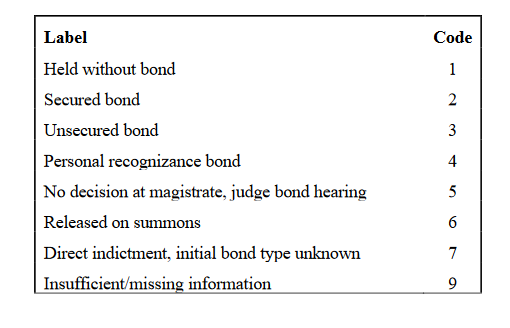

In [ ]:
# Following the chart above (from the Lecture notebook),
# we can remove Sentence_Length values that correspond to
# Sentence_Type = 4:
Sentence_Length = Sentence_Length.mask( Sentence_Type == 4, 0)

# Checking how many missing variables are left in Sentence_Length:
print(np.sum(Sentence_Length.isnull())) # 274

274


In [ ]:
# Also following the chart, we can replace Sentence_Length
# values corresponding to Sentence_Type = 9 w/ NaN:
Sentence_Length = Sentence_Length.mask( Sentence_Type == 9, np.nan)

# Checking how many missing variables are left in Sentence_Length:
print(np.sum(Sentence_Length.isnull())) # 274

# Seeing how many total values are in Sentence_Length:
print(len(Sentence_Length)) # 22986

# This brings down the missing values to 274, out of a category
# with 22986 variables, which seems reasonable.

# Passing the temporary variables back to the dataframe:
ddf['ImposedSentenceAllChargeInContactEvent'] = Sentence_Length
ddf['SentenceTypeAllChargesAtConvictionInContactEvent'] = Sentence_Type

274
22986


**Q3.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

In [ ]:
# 1.
# The Census Bureau collects race data on a self-identification
# basis. Survey users are able to indicate whether they are of one or
# more race. Recently they added two new categories to those listed
# on the form, to make the final list:
# - American Indian or Alaska Native
# - Asian
# - Black or African American
# - Hispanic or Latino
# - Middle Eastern or North African
# - Native Hawaiian or Pacific Islander
# - White

In [ ]:
# 2.
# Race data is used by policymakers to inform their
# decisions on what laws, rules, regulations, etc. they
# implment and how those regulations are implemented.

In [ ]:
# 3.
# I think the Census Bureau has done a good job updating/modernizing
# their race categories with time. Looking at how the Office of
# Management and Budget (OMB) has maintained the standards for how
# these questions are presented, it's clear an active effort is being
# made to ensure they are current and up-to-date. One area of concern
# I might have about collecting all of this data is related to data
# security. If the U.S. gov suffered a data leak, millions of U.S.
# citizens' race and ethnicity data would be exposing. This makes
# it extremely important to maintain proper security for this data.

In [ ]:
# 4.
# The Census asks about the sex of the respondant: male or
# female. Apart from the importance of data security I mentioned
# earlier, I think collecting data on gender identity or sexual
# orientation (which are not current categories) could
# provide more useful insight into the U.S. population.

In [ ]:
# 5.
# I think cleaning race and ethnicity data would be extremely
# challenging. If respondants don't self-identify their race,
# it might be useful to assign them one of the highest-frequency
# races of their region. However, you might argue that assigning
# them a race for the sake of data analysis goes against the
# fact that they didn't want their race taken into account. It
# would then become a matter of properly taking respondants
# with no race data into account with respondants who do.

In [ ]:
# 6.
# A race/gender/ethnicity imputing algorithm would have the potential
# to be extremely problematic. On the one hand, if it was inaccurate,
# it would provide decision-makers with incorrect demographic
# information. On the other hand, if people didn't volumtarily
# provide their demograhic information, then obtaining it via an
# algorthim would be going against their wishes.